In [4]:
import pandas as pd
import numpy as np
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import ast

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/My Drive/CIS-5190-Project/Code/raw/wsj_fx_articles.csv')

In [ ]:
def clean_text(text):
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^\w\s.,!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
df['clean_text'] = df['text'].apply(clean_text)
df['clean_headline'] = df['headline'].apply(clean_text)

In [ ]:
pd.set_option('max_colwidth', 1000)

In [ ]:
df['clean_text'].head(5)

0                                             NEW YORK Despite Russian President Boris Yeltsins unexpected resignation Friday, dont expect any big movements in the currency markets during this first week of the new millennium. Skittish investors have been sitting on the sidelines since late December, worried that year2000 problems could disrupt yearend transactions. While the change to the new year was uneventful, traders may not immediately jump back into the currency market this week.
1    The Bank of Japan greeted the new year with yet another attempt to curb the strengthening yen, intervening against the dollar in Tokyo as financial markets reopened following the holiday. After the Tokyo market closed, the dollar had firmed to 103.01 yen, up from 101.75 in early dealings. Ministry of Finance officials confirmed the central banks move and said they were prepared for further action if needed to curb the yens rise. The size of the intervention wasnt immediately known.
2               

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [ ]:
df.size

108880

In [ ]:
def sentiment_analysis():
    i = 0
    def inner(text):
        nonlocal i
        i += 1
        print(f"Processing row: {i}")
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        outputs = model(**inputs)
        probs = softmax(outputs.logits, dim=1)
        return probs.detach().numpy()
    return inner

sentiment_analysis_func = sentiment_analysis()


In [ ]:
df['sentiment_probs'] = df['clean_text'].apply(sentiment_analysis_func)
df['sentiment'] = df['sentiment_probs'].apply(lambda x: ['negative', 'neutral', 'positive'][x.argmax()])

Streaming output truncated to the last 5000 lines.
Processing row: 5889
Processing row: 5890
Processing row: 5891
Processing row: 5892
Processing row: 5893
Processing row: 5894
Processing row: 5895
Processing row: 5896
Processing row: 5897
Processing row: 5898
Processing row: 5899
Processing row: 5900
Processing row: 5901
Processing row: 5902
Processing row: 5903
Processing row: 5904
Processing row: 5905
Processing row: 5906
Processing row: 5907
Processing row: 5908
Processing row: 5909
Processing row: 5910
Processing row: 5911
Processing row: 5912
Processing row: 5913
Processing row: 5914
Processing row: 5915
Processing row: 5916
Processing row: 5917
Processing row: 5918
Processing row: 5919
Processing row: 5920
Processing row: 5921
Processing row: 5922
Processing row: 5923
Processing row: 5924
Processing row: 5925
Processing row: 5926
Processing row: 5927
Processing row: 5928
Processing row: 5929
Processing row: 5930
Processing row: 5931
Processing row: 5932
Processing row: 5933
Proc

In [ ]:
print(df[['date', 'clean_headline', 'sentiment', 'sentiment_probs']])


KeyError: "['sentiment', 'sentiment_probs'] not in index"

In [ ]:
df.to_csv('wsj_fx_sent.csv', index=False)


In [ ]:
sent = pd.read_csv('/content/drive/My Drive/CIS-5190-Project/Code/raw/wsj_fx_sent.csv')

In [ ]:
sent.size

108880

In [ ]:
filtered_articles = sent[sent['clean_text'].str.contains('China|Chinese|Beijing|Shanghai|Yuan|Renminbi|CNY|Xi Jinping', case=False, na=False)]


In [ ]:
import pandas as pd

full_dates = pd.date_range(start='2000-01-01', end='2024-01-01', freq='D')

filtered_articles['date'] = pd.to_datetime(filtered_articles['date'])

unique_dates = filtered_articles['date'].dropna().unique()

unique_dates_index = pd.DatetimeIndex(unique_dates)

missing_dates = full_dates.difference(unique_dates_index)

# Output the number of missing dates and the missing dates themselves
print(f"Number of missing dates: {len(missing_dates)}")
print("Missing dates:", missing_dates)


Number of missing dates: 8022
Missing dates: DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-30',
               '2023-12-31', '2024-01-01'],
              dtype='datetime64[ns]', length=8022, freq=None)


<ipython-input-40-0418affbca55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_articles['date'] = pd.to_datetime(filtered_articles['date'])


In [ ]:
len(filtered_articles)

1133

In [ ]:
filtered_articles['date'].unique()

<DatetimeArray>
['2000-11-21 00:00:00', '2001-04-05 00:00:00', '2001-07-24 00:00:00',
 '2001-11-20 00:00:00', '2002-01-07 00:00:00', '2002-01-15 00:00:00',
 '2003-07-21 00:00:00', '2003-09-02 00:00:00', '2003-09-15 00:00:00',
 '2003-09-25 00:00:00',
 ...
 '2023-03-27 00:00:00', '2023-03-28 00:00:00', '2023-03-30 00:00:00',
 '2023-04-01 00:00:00', '2023-04-14 00:00:00', '2023-06-13 00:00:00',
 '2023-06-23 00:00:00', '2023-07-05 00:00:00', '2023-08-16 00:00:00',
 '2023-12-29 00:00:00']
Length: 745, dtype: datetime64[ns]

# Filter and clean the sentiment data

In [ ]:

# Keyword list relevant to China
keywords = [
    "China", "Chinese", "Yuan", "¥", "Renminbi", "CNY", "RMB", "Beijing", "Shanghai", "Shenzhen", "People's Currency", "元", "圆",
    "Hong Kong", "CCP", "Xi Jinping", "Belt and Road", "Silk Road",
    "Taiwan", "Trade War", "Sino",
    "PBOC", "Alibaba", "Tencent", "Baidu", "Weibo", "Huawei", "ByteDance", "ZTE", "Sinopec", "Haier", "Geely", "Xiaomi", "Hang Seng",
    "Mandarin", "Cantonese", "Sichuan", "Fujian",
    "Guangdong", "One Belt One Road", "AIIB"
]

pattern = '|'.join(keywords)

In [6]:
sent = pd.read_csv('/content/drive/My Drive/CIS-5190-Project/Code/cleaned/wsj_fx_sent.csv')

In [ ]:
sent.shape[0]

10888

In [7]:
def extract_probs(row):
    prob_list = row.strip('[]').split()
    probs = [float(prob) for prob in prob_list]
    return probs[0], probs[1], probs[2]

sent[['neg_prob', 'neutral_prob', 'pos_prob']] = sent['sentiment_probs'].apply(extract_probs).apply(pd.Series)


In [8]:
filtered_articles = sent[sent['text'].str.contains(pattern, case=False, na=False)]

In [9]:
filtered_articles = filtered_articles[['date', 'neg_prob', 'neutral_prob', 'pos_prob']]
filtered_articles['date'] = pd.to_datetime(filtered_articles['date'])

<ipython-input-9-e9e4df1557ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_articles['date'] = pd.to_datetime(filtered_articles['date'])


In [10]:
filtered_articles.head()
filtered_articles.to_csv("chat.csv")

In [11]:
import pandas as pd


filtered_articles['date'] = pd.to_datetime(filtered_articles['date'])

full_date_range = pd.DataFrame({'date': pd.date_range(start='2000-01-01', end='2024-01-01')})

full_df = full_date_range.merge(filtered_articles, on='date', how='left')

full_df[['neg_prob', 'neutral_prob', 'pos_prob']] = full_df[['neg_prob', 'neutral_prob', 'pos_prob']].ewm(span=100, adjust=False).mean()

full_df[['neg_prob', 'neutral_prob', 'pos_prob']] = full_df[['neg_prob', 'neutral_prob', 'pos_prob']].fillna(method='bfill')


<ipython-input-11-d746632614df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_articles['date'] = pd.to_datetime(filtered_articles['date'])


In [ ]:
full_df

,date,neg_prob,neutral_prob,pos_prob
0,2000-01-01,0.071526,0.024095,0.904380
1,2000-01-02,0.071526,0.024095,0.904380
2,2000-01-03,0.071526,0.024095,0.904380
3,2000-01-04,0.071526,0.024095,0.904380
4,2000-01-05,0.071526,0.024095,0.904380
...,...,...,...,...
9260,2023-12-28,0.321149,0.316332,0.362520
9261,2023-12-29,0.255821,0.244393,0.499786
9262,2023-12-30,0.255821,0.244393,0.499786
9263,2023-12-31,0.255821,0.244393,0.499786


<ipython-input-16-78dcedd3c2ae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['date'] = pd.to_datetime(plot_df['date'])  # Ensure 'date' is in datetime format


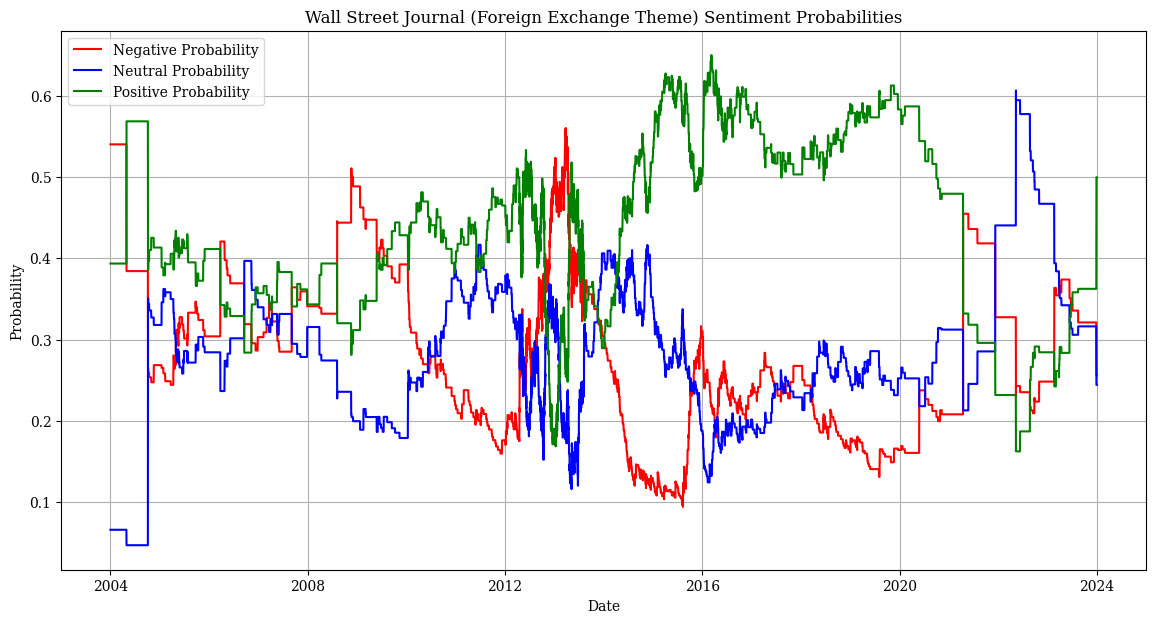

In [16]:
import matplotlib.pyplot as plt

plot_df = full_df[full_df['date'] >= '2004-01-01']

plt.rcParams['font.family'] = 'serif'

plot_df['date'] = pd.to_datetime(plot_df['date'])  # Ensure 'date' is in datetime format

plt.figure(figsize=(14, 7))
plt.plot(plot_df['date'], plot_df['neg_prob'], label='Negative Probability', color='red')
plt.plot(plot_df['date'], plot_df['neutral_prob'], label='Neutral Probability', color='blue')
plt.plot(plot_df['date'], plot_df['pos_prob'], label='Positive Probability', color='green')

plt.title('Wall Street Journal (Foreign Exchange Theme) Sentiment Probabilities')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
full_df.to_csv("wsj_fx_signals.csv")